# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config info

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "APPID=" + api_key + "&units=" + units + "&q="

name = []
country = []
lat = []
long = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []


print('Beginning Data Retrieval')
print('-----------------------------------------')


#Build query
for city in cities:
    
    #time delay
    time.sleep(1.001)
    
    #Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()

    try:
        name.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        lat.append(weather_json['coord']['lon'])
        long.append(weather_json['coord']['lat'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])

    except KeyError:
        print("City not found.  Skipping... ")
    
    print(f"Processing data for city = {city}.")


Beginning Data Retrieval
-----------------------------------------
City not found.  Skipping... 
Processing data for city = pavda.
Processing data for city = avarua.
Processing data for city = hobart.
Processing data for city = new norfolk.
Processing data for city = chililabombwe.
City not found.  Skipping... 
Processing data for city = fevralsk.
Processing data for city = sai buri.
Processing data for city = norman wells.
Processing data for city = lebu.
Processing data for city = gingoog.
Processing data for city = punta arenas.
Processing data for city = talaya.
Processing data for city = airai.
Processing data for city = klaksvik.
Processing data for city = east london.
Processing data for city = thompson.
Processing data for city = caravelas.
Processing data for city = hermanus.
Processing data for city = mar del plata.
Processing data for city = kupang.
Processing data for city = saint-philippe.
City not found.  Skipping... 
Processing data for city = mys shmidta.
Processing dat

Processing data for city = chiscani.
Processing data for city = paysandu.
City not found.  Skipping... 
Processing data for city = hihifo.
Processing data for city = bambous virieux.
Processing data for city = saskylakh.
Processing data for city = talara.
Processing data for city = itoman.
Processing data for city = tomatlan.
Processing data for city = port macquarie.
Processing data for city = kamiiso.
Processing data for city = esperance.
Processing data for city = vila.
City not found.  Skipping... 
Processing data for city = monte cristi.
City not found.  Skipping... 
Processing data for city = qui nhon.
City not found.  Skipping... 
Processing data for city = bajo baudo.
Processing data for city = lorengau.
City not found.  Skipping... 
Processing data for city = bolungarvik.
Processing data for city = gat.
Processing data for city = monte patria.
Processing data for city = fort nelson.
Processing data for city = abay.
City not found.  Skipping... 
Processing data for city = senty

Processing data for city = agapovka.
Processing data for city = kiama.
City not found.  Skipping... 
Processing data for city = marcona.
Processing data for city = beloha.
City not found.  Skipping... 
Processing data for city = julana.
Processing data for city = saveh.
Processing data for city = broken hill.
Processing data for city = huarmey.
Processing data for city = bastia.
Processing data for city = brufut.
Processing data for city = lufilufi.
Processing data for city = kambove.
Processing data for city = henties bay.
Processing data for city = cascais.
Processing data for city = litein.
Processing data for city = bubaque.
Processing data for city = ambulu.
Processing data for city = hasaki.
Processing data for city = malanje.
Processing data for city = mishkino.
Processing data for city = huilong.
Processing data for city = daru.
Processing data for city = kalawit.
City not found.  Skipping... 
Processing data for city = masjed-e soleyman.
Processing data for city = mtwango.
Pro

Processing data for city = maebaru.
Processing data for city = bam.
Processing data for city = ballina.
Processing data for city = uvat.
Processing data for city = gagnoa.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_transposed = zip(name,country,lat,long,temp_max,humidity,cloudiness,windspeed)
weather_df = pd.DataFrame(weather_transposed, columns=['City','Country','Latitude',
                                                       'Longitude','Max Temperature',
                                                       'Humidity','Cloudiness','Wind Speed'])

weather_df.to_csv('city_data.csv')

weather_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,-159.78,-21.21,71.60,60,15,8.05
1,Hobart,AU,147.33,-42.88,44.01,87,90,8.05
2,New Norfolk,AU,147.06,-42.78,44.01,87,90,8.05
3,Chililabombwe,ZM,27.84,-12.37,72.68,47,69,6.34
4,Sai Buri,TH,101.62,6.70,73.76,94,15,1.61
...,...,...,...,...,...,...,...,...
532,Maebaru,JP,130.20,33.55,73.99,73,90,24.16
533,Bam,IR,58.36,29.11,73.94,18,0,11.81
534,Ballina,IE,-9.15,54.11,53.01,87,40,9.17
535,Uvat,RU,68.90,59.14,35.96,85,60,3.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

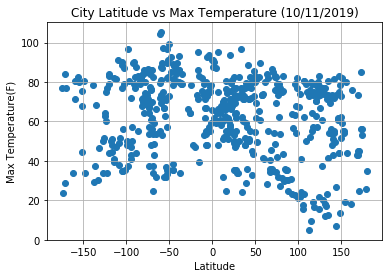

In [12]:
# Build a scatter plot for Latitude vs Max Temp
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

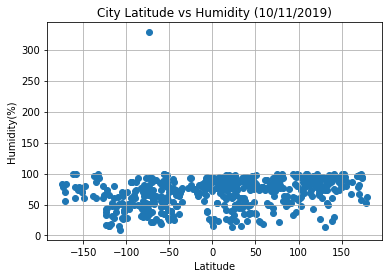

In [13]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

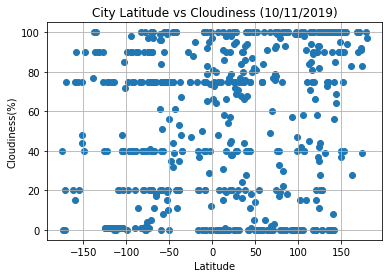

In [14]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

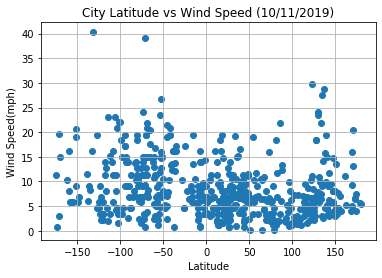

In [15]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCitiesbyLatitude.png")

# Show plot
plt.show()